# Importance Sampling

본 코드는 Importance Sampling의 구현 예시입니다.  
본 코드에서는 Mixture distribution 중 하나인 Gaussian Mixture distribution을 이용하여 구현하였습니다.  
본 코드를 통하여, 기초적인 Sampling Based Inference인 Importance Sampling의 이론과 구현 과정을 익힐 수 있습니다.

Importance Sampling은 원하는 확률값이나 기댓값을 직접 구하는 것을 목표로 Sampling하는 방법입니다.  
Forward Sampling과 Rejection Sampling은 Sampling된 결과를 바탕으로 히스토그램을 그려서 pdf를 나타내었다면, Importance Sampling은 이러한 과정 없이 원하는 확률값과 기댓값을 구함로써 계산량을 줄일 수 있습니다.  


먼저 Importance Sampling으로 확률 모델의 기댓값을 구하는 과정을 알아봅시다.
확률 모델의 확률변수 z와 이의 distribution p(z)이 있을 경우, 임의의 함수 f(z)에 대한 기댓값은 정의에 따라 아래와 같이 구할 수 있습니다.
$$\mathrm{E}[f(z)] = \int f(z)p(z)\,dz$$
그러나 현재 단계에서 Z의 distribution p(z)를 알 수 없으므로 우리가 잘 알고 있는 새로운 함수 q(z)를 도입하여 식을 전개해보면 아래와 같습니다.
$$\mathrm{E}[f(z)] = \int f(z)p(z)\,dz = \int f(z) \frac{p(z)}{q(z)} q(z)\, dz \cong \frac{1}{L}\sum_{l=1}^L \frac{p(z_l)}{q(z_l)}f(z_l)$$
위의 유도 과정의 마지막 부분은 q(z)dz를 Normalizing constant $\frac{1}{L}$로, 적분을 finite sum으로 바꾸어 근사하였습니다. 위와 같은 근사가 가능한 이유는 무한대로 많은 z에 대한 확률 계산이 포함된 적분을 더 이상 전개할 순 없지만, z값이 어떤 값으로 주어졌다면 이의 정확한 p(z)를 구하는 것은 가능하기 때문입니다.        
이때 위의 finite sum에서 sample $z_l$의 함수값 $f(z_l)$에 곱해진 값은 $f(z_l)$의 weight로 해석할 수 있습니다. 이를 우리는 Importance Weight로 정의하며 아래와 같이 표현합니다.
$$r_l = \frac{p(z_l)}{q(z_l)}$$

마찬가지의 아이디어와 방법으로 Importance Sampling으로 확률 모델의 확률값을 구하는 방법을 아래와 같습니다. 
$$P(z>1) = \int 1_{z>1}p(z)\,dz = \int 1_{z>1} \frac{p(z)}{q(z)} q(z)\, dz \cong \frac{1}{L}\sum_{l=1}^L \frac{p(z_l)}{q(z_l)}1_{z_l>1}$$
$1_(z>1)$은 indicator function을 의미하며 z>1인 z에 대해서는 $1_(z>1)(z)=1$, z$leq$1인 z에 대해서는 $1_(z>1)(z)=0$을 갖는 함수입니다.

In [7]:
'''
@ copyright: AAI lab (http://aailab.kaist.ac.kr/xe2/page_GBex27)
@ author: Moon Il-chul: icmoon@kaist.ac.kr
@ annotated by Shin Dong-Hyeok: tlsehdgur0@kaist.ac.kr
'''
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

%matplotlib inline  

## Forward Sampling

In [8]:
# Gaussian Mixture distribution의 Hyper paramter의 true value 부여
pi_true = np.array([0.35, 0.45, 0.2]) # Hyperparameter π의 실제 값
mu_true = np.array([-2,1,5])  # Hyperparameter μ의 실제 값
sigma_true = np.array([0.9, 0.3, .7])  # Hyperparameter Σ의 실제 값

N = 30000 # N : 전체 샘플의 갯수 
obs = np.zeros(N) # obs : N개의 샘플, X의 값을 저장

for i in range(N):
    # z에 대한 샘플링 과정
    z = np.random.random_sample() # [0.0, 1.0)에서 임의의 실수를 선택 
    idx = 0
    tempSum = 0
    
    # z가 속한 범위에 따라 Hyperparameter의 index를 결정하는 과정
    # ex) (0,0.35] -> 0 , (0.35,0.8] -> 1, (0.8,1] -> 2
    for j in range(np.size(pi_true)):
        if ((z > tempSum) & (z<=tempSum+pi_true[j])):
            idx = j
            break
        else:
            tempSum = tempSum + pi_true[j]
    
    # X에 대한 샘플링 과정
    # 샘플링한 z의 값에 대응하는 μ,Σ를 갖는 다변수 가우스 분포에서 X를 샘플링
    v_temp = np.random.normal(mu_true[idx], sigma_true[idx], 1)
    obs[i] = v_temp;

C:\Users\Dong-Hyeok\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
C:\Users\Dong-Hyeok\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


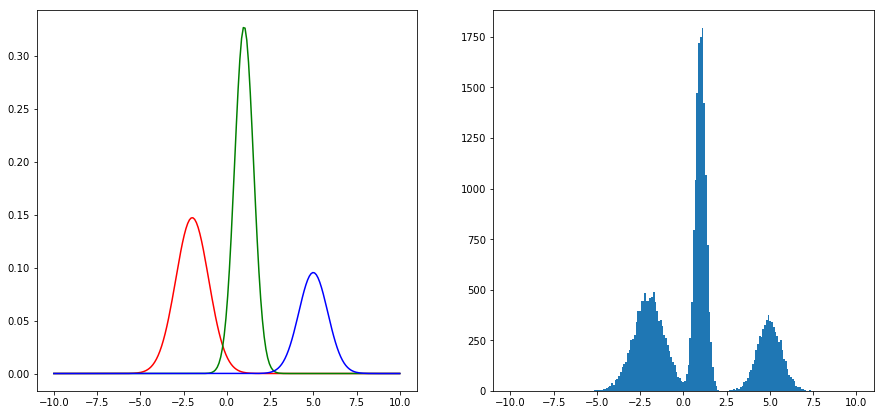

In [9]:
plt.figure(1, figsize=(15,7))
x = np.linspace(-10,10,(10-(-10))/0.1)
plt.subplot(1,2,1)
plt.plot(x,pi_true[0] * multivariate_normal.pdf(x, mu_true[0], sigma_true[0]),'r')
plt.plot(x,pi_true[1] * multivariate_normal.pdf(x, mu_true[1], sigma_true[1]),'g')
plt.plot(x,pi_true[2] * multivariate_normal.pdf(x, mu_true[2], sigma_true[2]),'b')

plt.subplot(1,2,2)
plt.hist(obs, bins=np.linspace(-10,10,(10-(-10))/0.1))
plt.show()

## Importance Sampling

In [10]:
mu = np.mean(obs) # Forward Sampling으로 만들어진 sample의 mean
sigma = np.std(obs) # Forward Sampling으로 만들어진 sample의 standard deviation
trial = 10
N = 30000 # N : 전체 sample의 갯수
mus = np.zeros(trial)

# Importance Sampling을 사용하여 N개의 sample로 f(z)의 기댓값을 구한 후,
# 위의 과정은 trial만큼 반복하여 trial개의 기댓값의 기댓값을 구하는 과정. 
for i in range(trial):
    cnt = 0
    sumofProduct = 0
    sumP = 0
    sumQ = 0
    sumPQ = 0
    samples = np.zeros((N,2))
    mu_assumed = 0 # q distribution의 mean
    sigma_assumed = 40 # q distribution의 standard deviation
    
    while cnt < N-1:   
        idx = np.random.randint(0,3) # 0,1,2에서 random으로 integer 하나를 선택
        sample = np.random.normal(mu_assumed,sigma_assumed, 1) 
        q = multivariate_normal.pdf(sample, mu_assumed, sigma_assumed) # q : N(mu_assumed, sigma_assumed)에서 sample이 나올 확률, q(z_l)
        p = pi_true[idx] * multivariate_normal.pdf(sample, mu_true[idx], sigma_true[idx]) # p : p(z_l)
        sumofProduct = sumofProduct + p/q * sample; # f(z) = z로 가정 
        sumPQ = sumPQ + p/q
        cnt = cnt + 1 
        # samples에 샘플 값과 importance weight를 함께 저장
        samples[cnt,0] = sample
        samples[cnt,1] = p/q
    mu_importancesampling = sumofProduct / sumPQ
    mus[i] = mu_importancesampling
# 여러 번의 trial로 구한 μ와 Σ
mu_trials = np.mean(mus)
std_trials = np.std(mus)

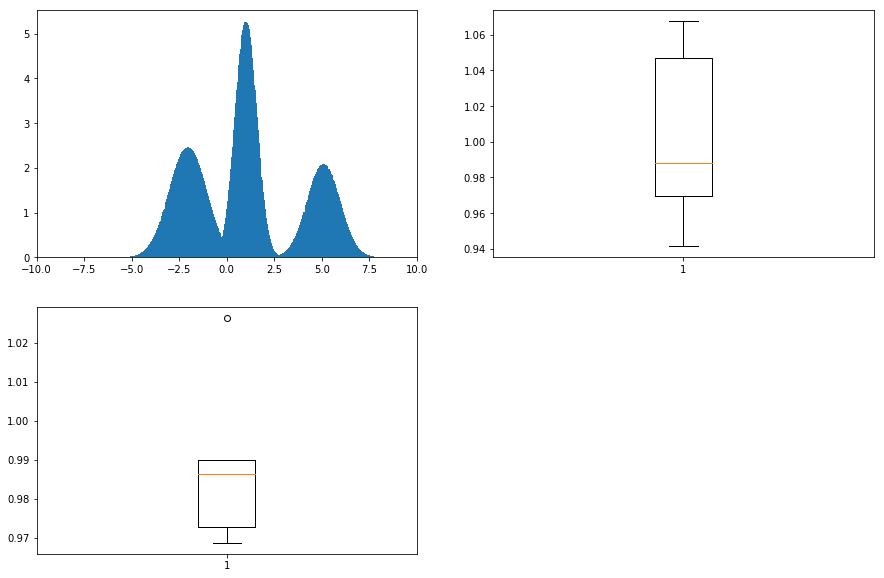

In [11]:
plt.figure(1, figsize = (15,10))
plt.subplot(2, 2, 1)
fig1 = plt.bar(samples[:,0], samples[:,1], width=0.1)
plt.xlim([-10, 10])

plt.subplot(2, 2, 2)
plt.boxplot(mus)

cnt = 0
mus_filtered = []
# 여러 μ값 중 (μ-σ,μ+σ)에 속하는 μ의 값을 추출하는 과정
for i in range(trial):
    if (mus[i] <= mu_trials + std_trials) & (mus[i] >= mu_trials-std_trials):
        cnt = cnt + 1
        mus_filtered.append(mus[i])
mus_filtered = np.asarray(mus_filtered)

plt.subplot(2, 2, 3)
plt.boxplot(mus_filtered)
plt.show()

In [14]:
print('Mu from original mixture distribution :', sum(pi_true*mu_true))
print('Mu from forward sampling : {0:.3f}.'.format(mu))
print('Mu from importance sampling: {0:.3f}.'.format(mu_trials))
print('Std from importance sampling: {0:.3f}.'.format(std_trials))
print('Lower bound of confidence interval from importance sampling: {0:.3f}'.format(mu_trials-1.96*std_trials/np.sqrt(trial)))
print('Upper bound of confidence intrval from importance sampling: {0:.3f}'.format(mu_trials+1.96*std_trials/np.sqrt(trial)))

print('Mu-Filtered from imprtance sampling: {0:.3f}.'.format(np.mean(mus_filtered)))
print('Std-filtered from importance sampling: {0:.3f}.'.format(np.std(mus_filtered)))
print('Lower bound of confidence interval from importance sampling-filtered: {0:.3f}.'.format(np.mean(mus_filtered)-1.96*np.std(mus_filtered)/np.sqrt(trial)))
print('Uppter bound of confidence interval from importance sampling-filtered: {0:.3f}.'.format(np.mean(mus_filtered)+1.96*np.std(mus_filtered)/np.sqrt(trial)))

Mu from original mixture distribution : 0.75
Mu from forward sampling : 0.757.
Mu from importance sampling: 1.002.
Std from importance sampling: 0.045.
Lower bound of confidence interval from importance sampling: 0.974
Upper bound of confidence intrval from importance sampling: 1.030
Mu-Filtered from imprtance sampling: 0.989.
Std-filtered from importance sampling: 0.020.
Lower bound of confidence interval from importance sampling-filtered: 0.976.
Uppter bound of confidence interval from importance sampling-filtered: 1.001.


## 결과해석부

첫 번째 그래프는 x축은 생성된 sample $z_l$ 값을, y축은 각 $z_l$에 해당하는 Importance weight $\frac{p(z_l)}{q(z_l)}$을 plot한 그래프입니다.  
두 번째 그래프는 10번의 Importance sampling을 실행하여 얻은 Z의 평균을 boxplot한 그래프입니다.  
세 번째 그래프는 10개의 Z의 평균 중에서 (μ-σ,μ+σ)에 속하는 평균값을 추출하여 boxplot한 그래프입니다.